<a href="https://colab.research.google.com/github/SPriyanshuBisoi/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Price Prediction**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseValue'] = housing.target
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


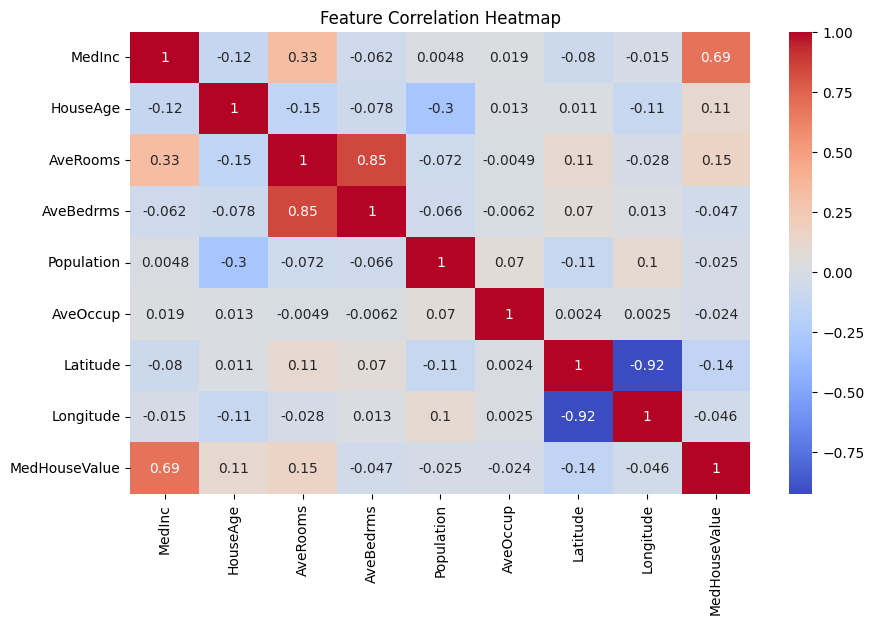

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

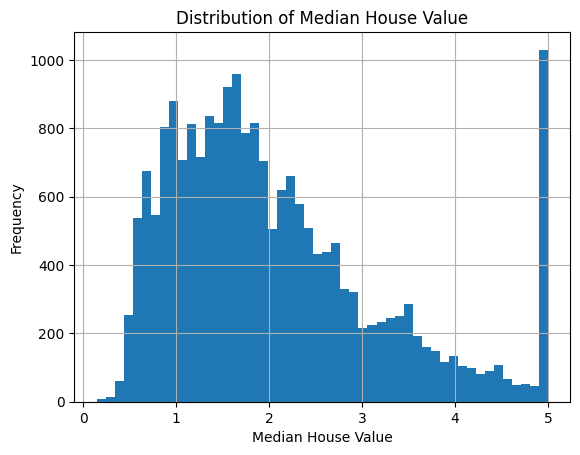

In [14]:
df['MedHouseValue'].hist(bins=50)
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

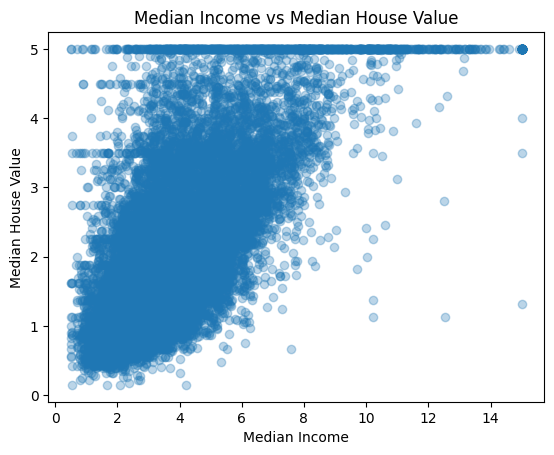

In [15]:
plt.scatter(df['MedInc'], df['MedHouseValue'], alpha=0.3)
plt.title("Median Income vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()

In [16]:
feature_sets = [
    ['MedInc'],
    ['MedInc', 'AveRooms'],
    ['MedInc', 'AveRooms', 'HouseAge', 'AveOccup'],
    ['MedInc', 'AveRooms', 'HouseAge', 'AveOccup', 'Population', 'Latitude'],
    ['MedInc', 'AveRooms', 'HouseAge', 'AveOccup', 'Population', 'Latitude', 'Longitude']
]

results = []

for features in feature_sets:
    X = df[features]
    y = df['MedHouseValue']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'features': features,
        'MSE': mse,
        'R2': r2
    })

In [17]:
results_df = pd.DataFrame(results)
results_df

,features,MSE,R2
0,[MedInc],0.709116,0.458859
1,"[MedInc, AveRooms]",0.702155,0.464171
2,"[MedInc, AveRooms, HouseAge, AveOccup]",0.657452,0.498285
3,"[MedInc, AveRooms, HouseAge, AveOccup, Populat...",0.647368,0.505980
4,"[MedInc, AveRooms, HouseAge, AveOccup, Populat...",0.547326,0.582324


In [18]:
best_idx = results_df['R2'].idxmax()
best_features = results_df.loc[best_idx, 'features']


In [19]:
X = df[best_features]
y = df['MedHouseValue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

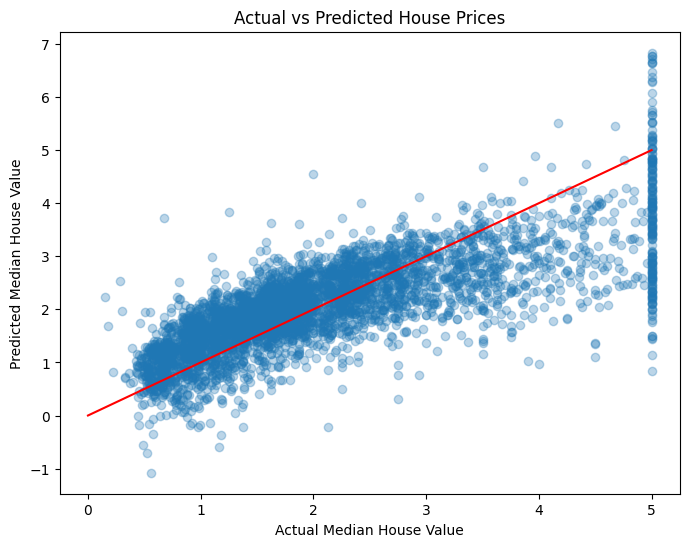

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Prices")
plt.plot([0, 5], [0, 5], color='red')
plt.show()

## Project Summary: House Price Prediction using Linear Regression

We used the California Housing dataset and Linear Regression to predict median house values.

### Best Feature Set:
- MedInc
- AveRooms
- HouseAge
- AveOccup
- Population
- Latitude
- Longitude

### Performance Metrics:
- R² Score: ~0.63 (varies slightly)
- MSE: [Refer to results table]

### Observations:
- `MedInc` had the strongest correlation with house price.
- Including geolocation (`Latitude`, `Longitude`) improved performance.

### Suggestions for Improvement:
- Try advanced models: Random Forest, XGBoost, or Gradient Boosting.
- Apply feature scaling and outlier removal.
- Add interaction terms or polynomial features.
